In [2]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf

tf.random.set_seed(seed)

os.environ['PATH'] = os.environ['XILINX_VITIS'] + '/bin:' + os.environ['PATH']


# May need to update path to match local installation
import sys
sys.path.append("/home/{}/Locked-in-Leptons/helpers/".format(os.environ['USER']))
import plotting

# Load the Data

In [3]:
x_train = np.load('../data/x_train.npy')
x_test = np.load('../data/x_test.npy')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [4]:
y_train = to_categorical(y_train,2) 
y_test = to_categorical(y_test,2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Constructing Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

model = Sequential()
model.add(Dense(64, input_shape=(17,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(2, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation('softmax'))

2025-04-23 10:03:39.327184: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
from callbacks import all_callbacks
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='model_1',
)
model.fit(x_train, y_train, batch_size = 1024, epochs = 10, validation_split = 0.25, callbacks=callbacks.callbacks)

Epoch 1/10
    1/26131 [..............................] - ETA: 14:31:14 - loss: 0.7323 - accuracy: 0.5146WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.1024s). Check your callbacks.


26115/26131 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9320
***callbacks***
saving losses to model_1/losses.log

Epoch 1: val_loss improved from inf to 0.17995, saving model to model_1/KERAS_check_best_model.h5

Epoch 1: val_loss improved from inf to 0.17995, saving model to model_1/KERAS_check_best_model_weights.h5

Epoch 1: saving model to model_1/KERAS_check_model_last.h5

Epoch 1: saving model to model_1/KERAS_check_model_last_weights.h5

***callbacks end***

26131/26131 [==============================] - 53s 2ms/step - loss: 0.1919 - accuracy: 0.9320 - val_loss: 0.1800 - val_accuracy: 0.9345 - lr: 0.0010
Epoch 2/10
   66/26131 [..............................] - ETA: 41s - loss: 0.1778 - accuracy: 0.9354

/home/fstrug/.conda/envs/hls4ml-tutorial/lib/python3.12/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26127/26131 [============================>.] - ETA: 0s - loss: 0.1783 - accuracy: 0.9350
***callbacks***
saving losses to model_1/losses.log

Epoch 2: val_loss improved from 0.17995 to 0.17766, saving model to model_1/KERAS_check_best_model.h5

Epoch 2: val_loss improved from 0.17995 to 0.17766, saving model to model_1/KERAS_check_best_model_weights.h5

Epoch 2: saving model to model_1/KERAS_check_model_last.h5

Epoch 2: saving model to model_1/KERAS_check_model_last_weights.h5

***callbacks end***

26131/26131 [==============================] - 49s 2ms/step - loss: 0.1783 - accuracy: 0.9350 - val_loss: 0.1777 - val_accuracy: 0.9352 - lr: 0.0010
Epoch 3/10
26105/26131 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9354
***callbacks***
saving losses to model_1/losses.log

Epoch 3: val_loss improved from 0.17766 to 0.17647, saving model to model_1/KERAS_check_best_model.h5

Epoch 3: val_loss improved from 0.17766 to 0.17647, saving model to model_1/KERAS_check_be

FileNotFoundError: [Errno 2] No such file or directory: 'model_1/losses.log'

In [11]:
from tensorflow.keras.models import load_model

model = load_model('model_1/KERAS_check_best_model.h5')

2025-04-21 21:41:30.341454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38148 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:27:00.0, compute capability: 8.0


In [12]:
# check number of parameters - then check numer of resources
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 64)                1152      
                                                                 
 relu1 (Activation)          (None, 64)                0         
                                                                 
 fc2 (Dense)                 (None, 32)                2080      
                                                                 
 relu2 (Activation)          (None, 32)                0         
                                                                 
 fc3 (Dense)                 (None, 32)                1056      
                                                                 
 relu3 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

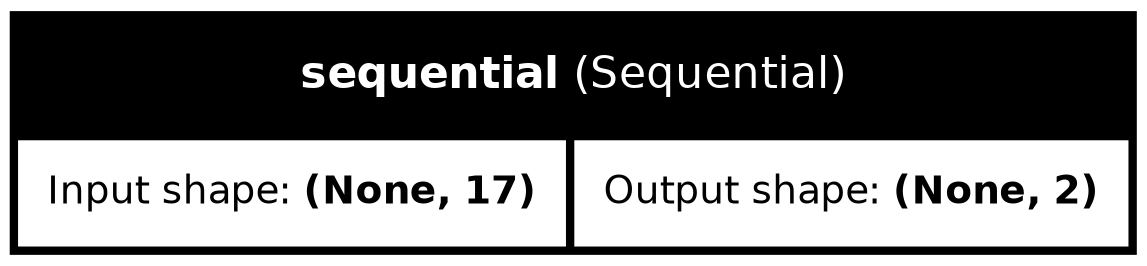

In [14]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_keras = model.predict(x_test)

816341/816341 [==============================] - 573s 701us/step


In [16]:
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))

Accuracy: 0.8920124592675143


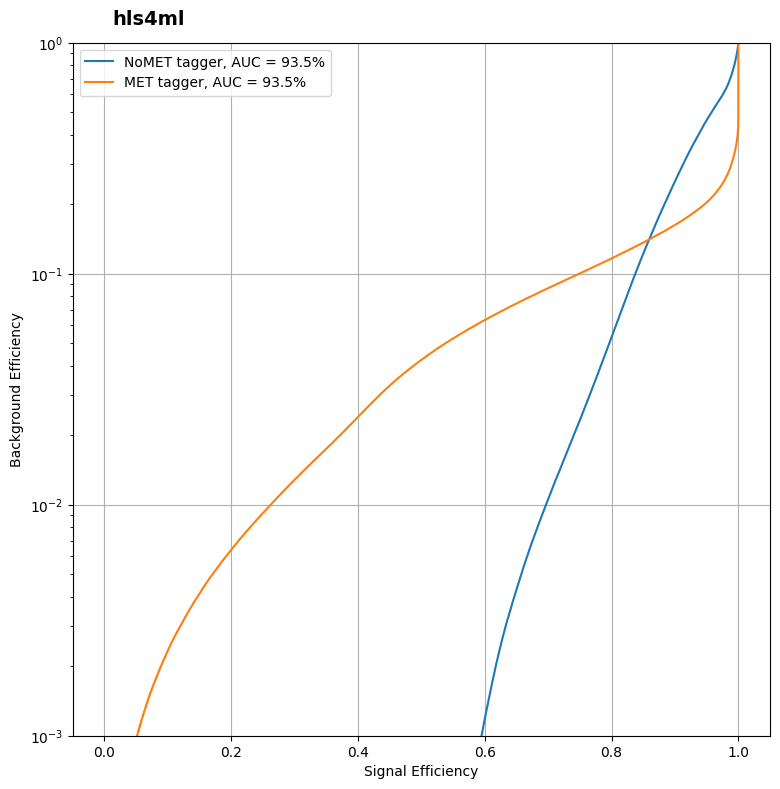

In [17]:
plt.figure(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, ["NoMET","MET"])

# Converting model to FPGA firmware with hls4ml

In [18]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='model', backend='Vitis')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, backend='Vitis', output_dir='model_1/hls4ml_prj', part='xcu250-figd2104-2L-e'
)

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 17]], output shape: [None, 17]
Layer name: fc1, layer type: Dense, input shapes: [[None, 17]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 2]
Layer name: activation, layer type: Softmax, input shapes: [[None, 2]], output shape: [None, 2]
-----------------------------------
Configuration
Model
  Precision:         fixed<16,6>
  ReuseFactor:       1
  Strategy: 

/home/frodriguez/.conda/envs/hls4ml-tutorial/lib/python3.12/site-packages/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


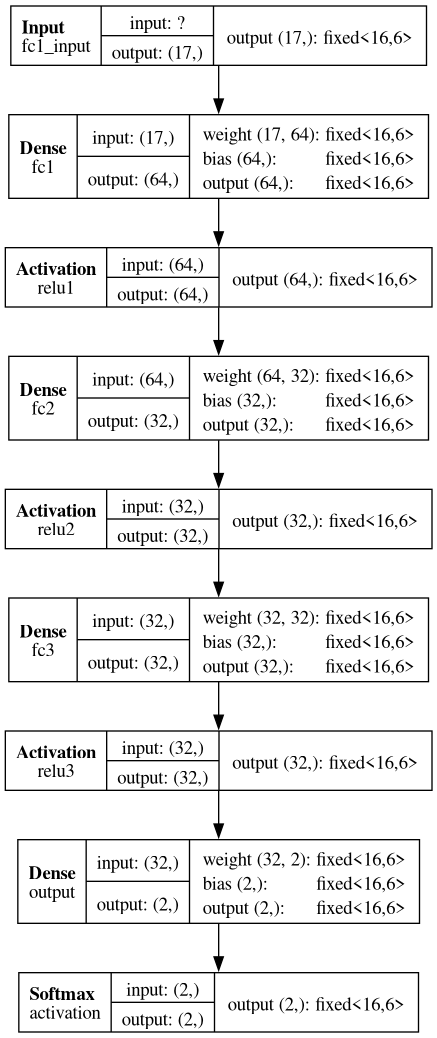

In [19]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [20]:
hls_model.compile()
X_test = np.ascontiguousarray(x_test)
y_hls = hls_model.predict(x_test)

Writing HLS project


/home/frodriguez/.conda/envs/hls4ml-tutorial/lib/python3.12/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


Keras  Accuracy: 0.8920124592675143
hls4ml Accuracy: 0.8915191370141214


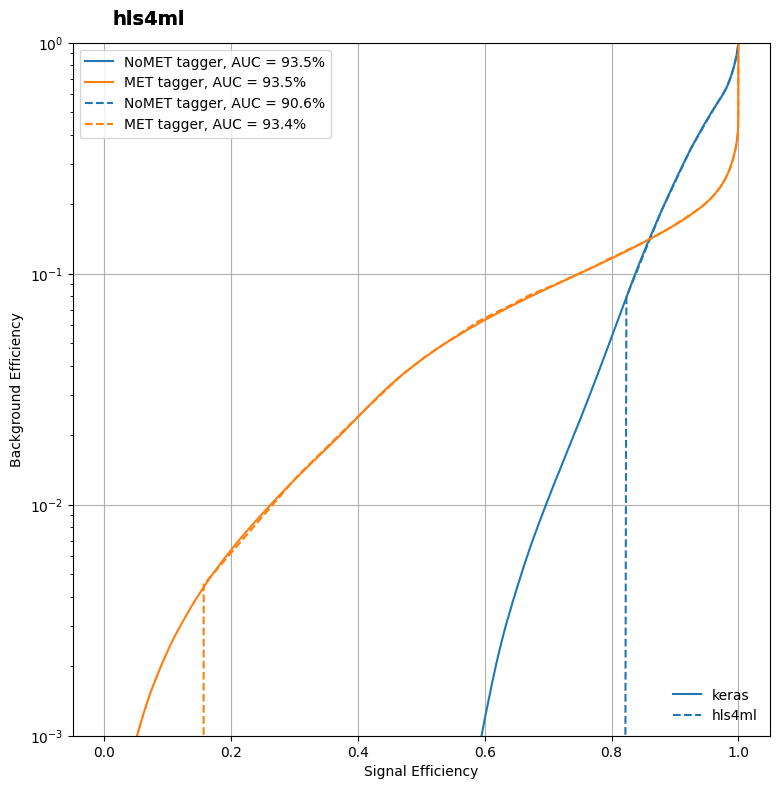

In [21]:
print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, ["NoMET","MET"])
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls, ["NoMET","MET"], linestyle='--')

from matplotlib.lines import Line2D

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['keras', 'hls4ml'], loc='lower right', frameon=False)
ax.add_artist(leg)
plt.savefig("plots/ROC_Comparison.png")


In [22]:
hls_model.build(csim=False)


****** Vitis HLS - High-Level Synthesis from C, C++ and OpenCL v2023.1 (64-bit)
  **** SW Build 3854077 on May  4 2023
  **** IP Build 3864474 on Sun May  7 20:36:21 MDT 2023
  **** SharedData Build 3865790 on Sun May 07 13:33:03 MDT 2023
    ** Copyright 1986-2022 Xilinx, Inc. All Rights Reserved.
    ** Copyright 2022-2023 Advanced Micro Devices, Inc. All Rights Reserved.

source /opt/metis/el8/contrib/amdtools/xilinx-2023.1/Vitis_HLS/2023.1/scripts/vitis_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/opt/metis/el8/contrib/amdtools/xilinx-2023.1/Vitis_HLS/2023.1/bin/unwrapped/lnx64.o/vitis_hls'
INFO: [HLS 200-10] For user 'frodriguez' on host 'vm01.head.cm.local' (Linux_x86_64 version 4.18.0-372.9.1.el8.x86_64) on Mon Apr 21 22:55:06 CDT 2025
INFO: [HLS 200-10] On os "Red Hat Enterprise Linux release 8.6 (Ootpa)"
INFO: [HLS 200-10] In directory '/nfs/ihfs/home_metis/frodriguez/Locked-in-Leptons/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-1510] Running: 

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.371',
  'BestLatency': '10',
  'WorstLatency': '10',
  'IntervalMin': '1',
  'IntervalMax': '1',
  'BRAM_18K': '4',
  'DSP': '146',
  'FF': '6361',
  'LUT': '45214',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'}}

In [23]:
hls4ml.report.read_vivado_report('model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vitis HLS Report for 'myproject'
* Date:           Mon Apr 21 22:56:53 2025

* Version:        2023.1 (Build 3854077 on May  4 2023)
* Project:        myproject_prj
* Solution:       solution1 (Vivado IP Flow Target)
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  |  5.00 ns|  4.371 ns|     0.62 ns|
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+-----------+-----------+-----+-----+---------+
    |  Latency (cycles) |   Latency (absolute)  |  Interval | Pipeline|
    |   min   |   max   |    min    |    max    | min | max |   Type  |
    +---------+---------+